# Notebook untuk project Nilaiku

## Import library

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset 

In [57]:
df = pd.read_csv("Student_Performs_factors.csv")

In [58]:
print(f"Dataset ini memiliki {df.shape[0]} baris dan {df.shape[1]} kolom")

Dataset ini memiliki 6607 baris dan 20 kolom


## Exploratory Data Analysis

### Informasi dataset

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

### Ringkasan statistik dataset

In [60]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


### Pemisahan fitur numerik dan kategorikal

In [61]:
numeric_feature = df.select_dtypes(include=["number"]).columns # Menyimpan fitur numerik
categorical_feature = df.select_dtypes(include=["object"]).columns # Menyimpan fitur kategorikal

print(numeric_feature)
print(categorical_feature)

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')
Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')


### Identifikasi nilai null

In [62]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

### Identifikasi baris duplikat

In [63]:
duplicated = df.duplicated().sum() # Menghitung jumlah baris yang terduplikasi
print(f"Jumlah baris duplikat: {duplicated}")

Jumlah baris duplikat: 0


### Pairplot fitur numerik

<Figure size 1200x1100 with 0 Axes>

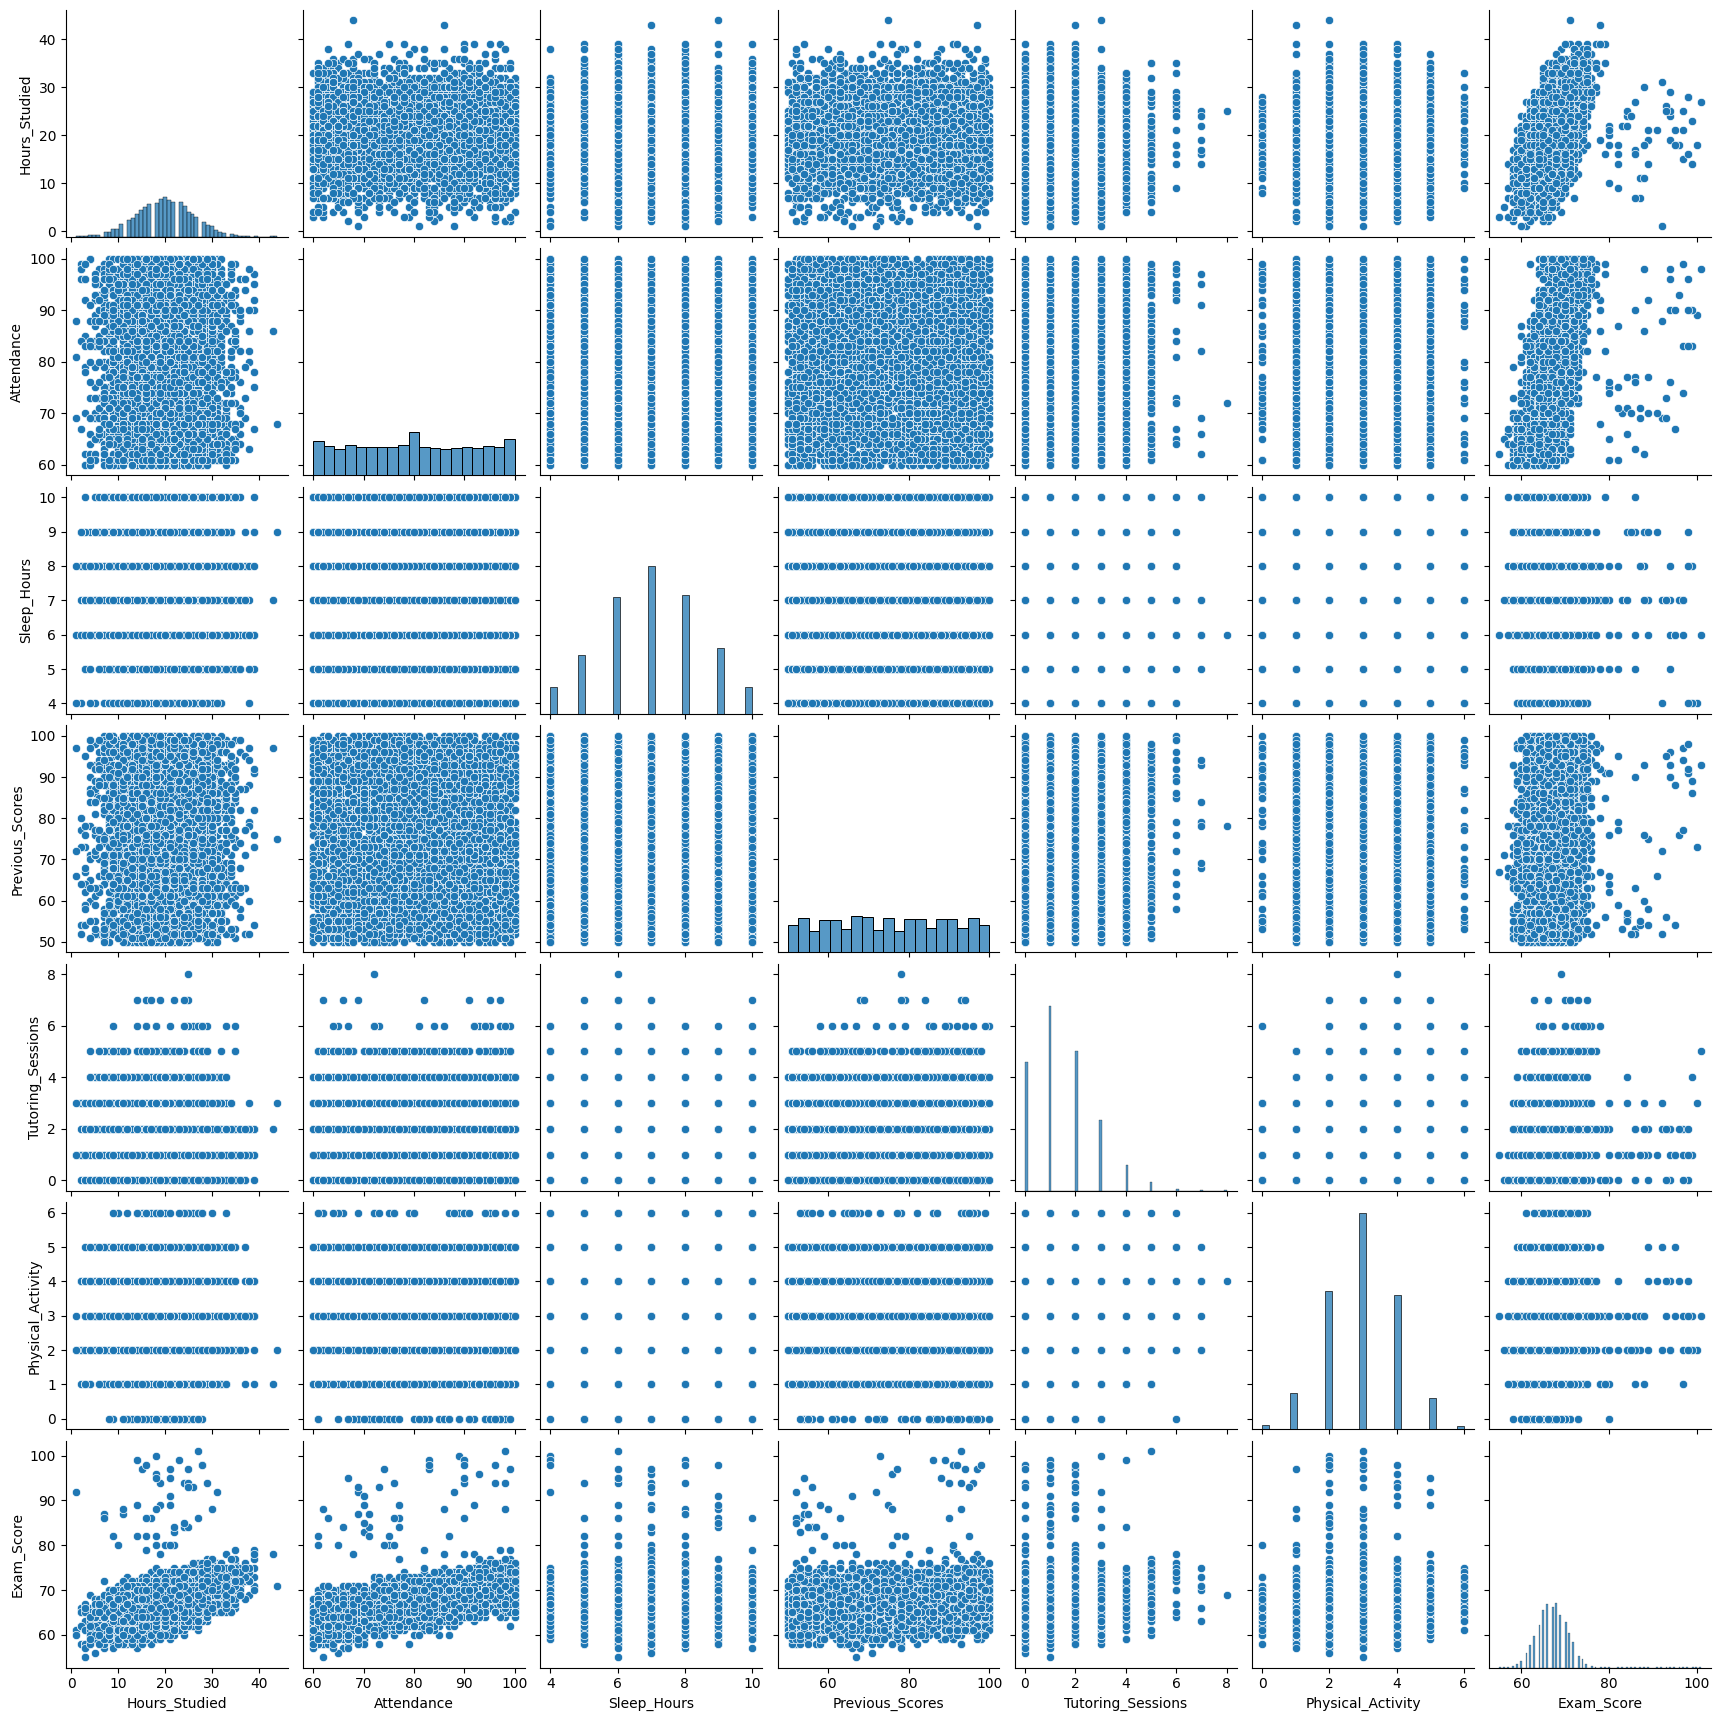

In [64]:
plt.figure(figsize=(12, 11))
sns.pairplot(df[numeric_feature])
plt.show()

### Matriks korelasi kolom numerik

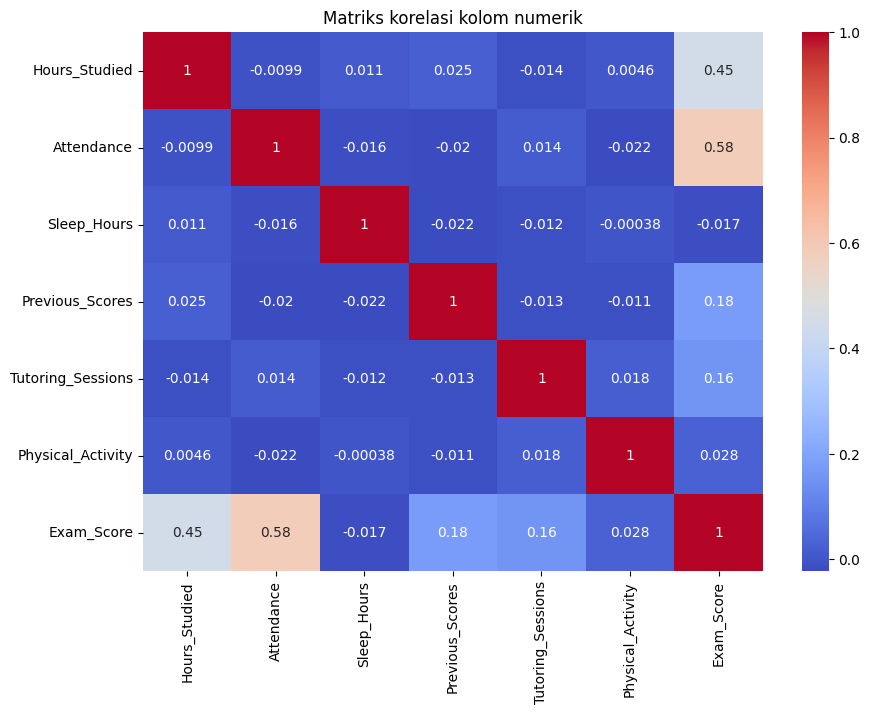

In [65]:
df_corr = df[numeric_feature].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(df_corr, cmap="coolwarm", annot=True)
plt.title("Matriks korelasi kolom numerik")
plt.show()

### Identifikasi outlier pada kolom numerik

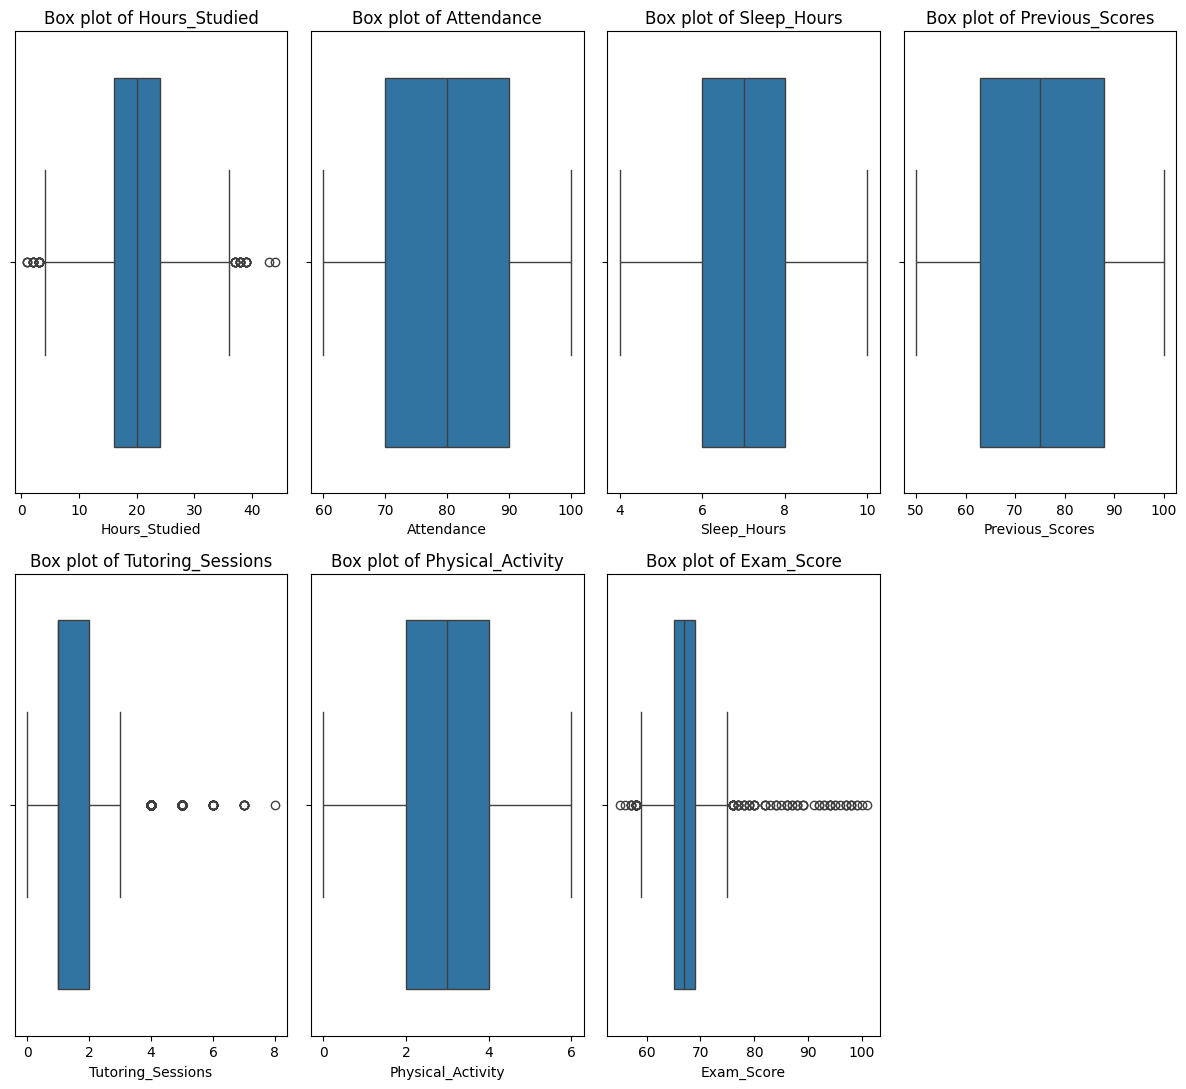

In [66]:
n_rows = 2 # Membuat subplot dengan 2 baris
n_cols = 4 # Membuat subplot dengan 4 kolom

plt.figure(figsize=(12, 11))
for i, col in enumerate(numeric_feature, 1):
    plt.subplot(n_rows, n_cols, i) # Inisiallisasi subplot
    sns.boxplot(x=df[col])
    plt.title(f"Box plot of {col}")

plt.tight_layout()
plt.show()

### Countplot kolom kategorikal

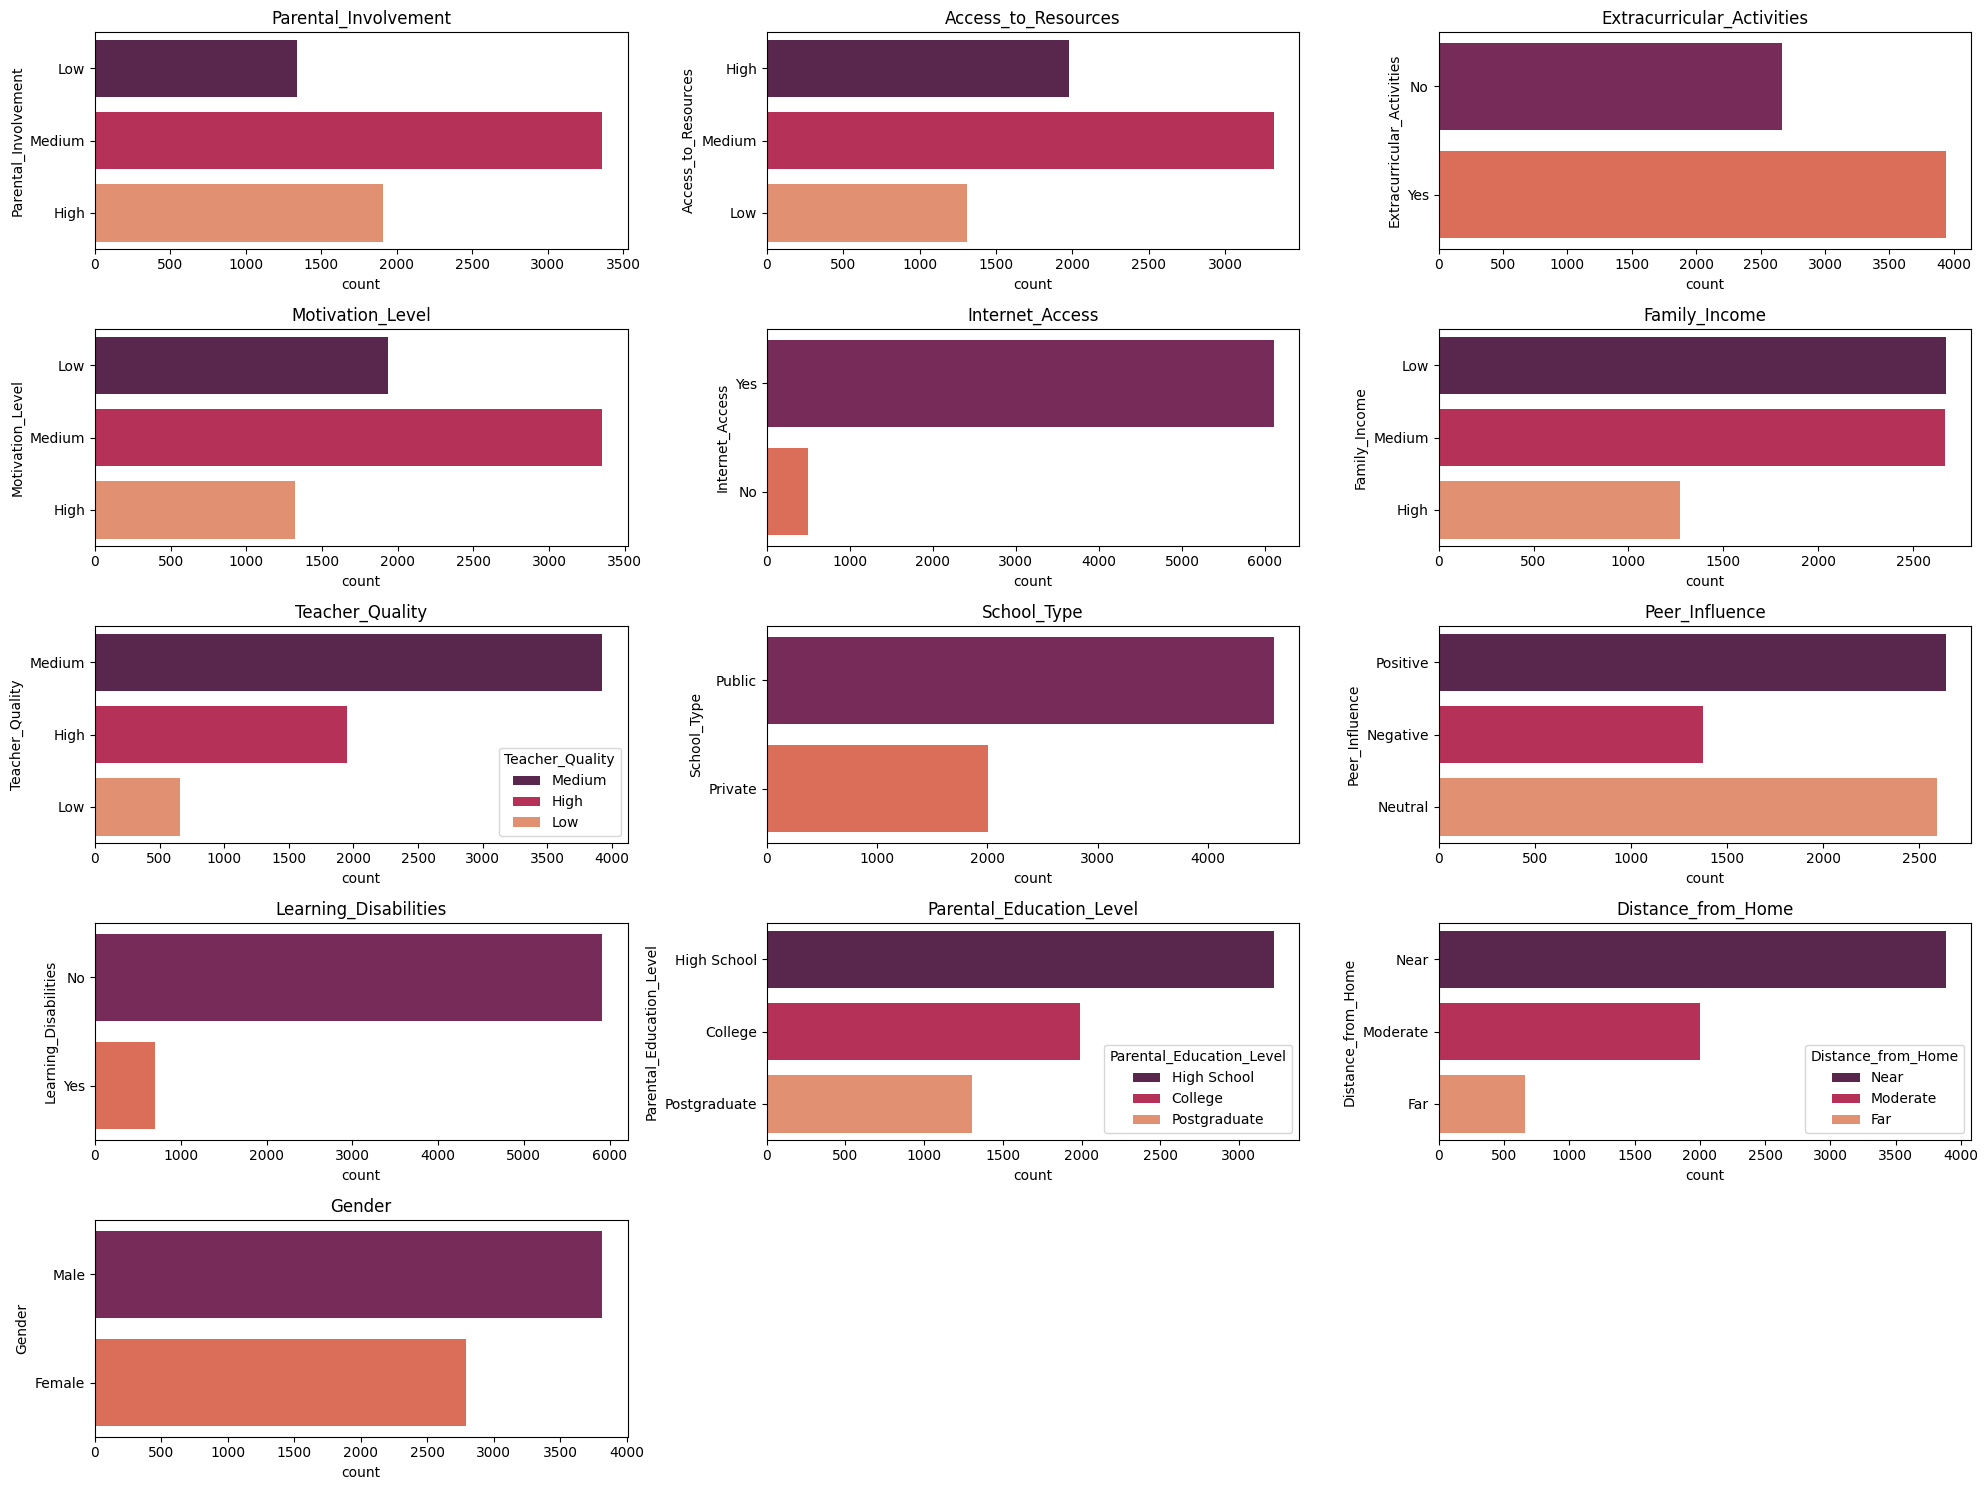

In [67]:
n_rows = 5 # Membuat subplot dengan 5 baris
n_cols = 3 # Membuat subplot dengan 3 kolom

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_feature, 1):
    plt.subplot(n_rows, n_cols, i) # Inisiallisasi subplot
    sns.countplot(y=df[col], palette="rocket", hue=df[col])
    plt.title(f"{col}")

plt.tight_layout()
plt.show()

### Feature selection

In [68]:
# selected_feature = ["Attendance", "Hours_Studied", "Previous_Scores", "Sleep_Hours", "Motivation_Level", "Teacher_Quality", "Internet_Access", "Access_to_Resources", "Parental_Involvement","Exam_Score"]
selected_feature =[
        "Attendance", "Hours_Studied", "Previous_Scores", "Sleep_Hours",
        "Tutoring_Sessions", "Peer_Influence", "Motivation_Level",
        "Teacher_Quality", "Access_to_Resources", "Exam_Score"
    ]
df = df[selected_feature]
print(f"Kolom yang dipilih ada: {len(selected_feature)}")
df.head()

Kolom yang dipilih ada: 10


,Attendance,Hours_Studied,Previous_Scores,Sleep_Hours,Tutoring_Sessions,Peer_Influence,Motivation_Level,Teacher_Quality,Access_to_Resources,Exam_Score
0,84,23,73,7,0,Positive,Low,Medium,High,67
1,64,19,59,8,2,Negative,Low,Medium,Medium,61
2,98,24,91,7,2,Neutral,Medium,Medium,Medium,74
3,89,29,98,8,1,Negative,Medium,Medium,Medium,71
4,92,19,65,6,3,Neutral,Medium,High,Medium,70


In [69]:
print(f"Jumlah data duplikat di dalam dataframe: {df.duplicated().sum()}")

Jumlah data duplikat di dalam dataframe: 0


## Preprocessing

### Menghapus nilai exam_score di atas 100 dan di bawah 0

In [70]:
df = df[(df["Exam_Score"] <= 100) & (df["Exam_Score"] >= 0)]
df.describe()

,Attendance,Hours_Studied,Previous_Scores,Sleep_Hours,Tutoring_Sessions,Exam_Score
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,79.974720,19.974266,75.067817,7.029216,1.493188,67.230548
std,11.546219,5.990424,14.399184,1.468177,1.229907,3.868502
min,60.000000,1.000000,50.000000,4.000000,0.000000,55.000000
25%,70.000000,16.000000,63.000000,6.000000,1.000000,65.000000
50%,80.000000,20.000000,75.000000,7.000000,1.000000,67.000000
75%,90.000000,24.000000,88.000000,8.000000,2.000000,69.000000
max,100.000000,44.000000,100.000000,10.000000,8.000000,100.000000


### Mengisi nilai kosong dalam kolom kategorikal dengan nilai modus

In [71]:
df.fillna(df.mode().iloc[0], inplace=True)  # Untuk fitur kategorikal
print("Nilai hilang pada dataset:")
print(df.isnull().sum())

Nilai hilang pada dataset:
Attendance             0
Hours_Studied          0
Previous_Scores        0
Sleep_Hours            0
Tutoring_Sessions      0
Peer_Influence         0
Motivation_Level       0
Teacher_Quality        0
Access_to_Resources    0
Exam_Score             0
dtype: int64


### Scaling

In [72]:
# Memisahkkan fitur dan target untuk melakukan  dan encoding
X = df.drop(columns="Exam_Score")
y = df["Exam_Score"]

from sklearn.preprocessing import MinMaxScaler
X_numeric = X.select_dtypes(include="number").columns

scaler = MinMaxScaler()
X[X_numeric] = scaler.fit_transform(X[X_numeric])
X.head()

,Attendance,Hours_Studied,Previous_Scores,Sleep_Hours,Tutoring_Sessions,Peer_Influence,Motivation_Level,Teacher_Quality,Access_to_Resources
0,0.600,0.511628,0.46,0.500000,0.000,Positive,Low,Medium,High
1,0.100,0.418605,0.18,0.666667,0.250,Negative,Low,Medium,Medium
2,0.950,0.534884,0.82,0.500000,0.250,Neutral,Medium,Medium,Medium
3,0.725,0.651163,0.96,0.666667,0.125,Negative,Medium,Medium,Medium
4,0.800,0.418605,0.30,0.333333,0.375,Neutral,Medium,High,Medium


### Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Menggunakan ordinal encoder agar hasil encoding dan kategori sesuai dengan level/tingkatannya
X_categorical = X.select_dtypes(include="object").columns

categories = [["Positive", "Neutral", "Negative"],
            ["Low", "Medium", "High"],
            ["Low", "Medium", "High"],
            ["Low", "Medium", "High"]
            ]

encoder = OrdinalEncoder(categories=categories)

X[X_categorical] = encoder.fit_transform(X[X_categorical])
X.head()

,Attendance,Hours_Studied,Previous_Scores,Sleep_Hours,Tutoring_Sessions,Peer_Influence,Motivation_Level,Teacher_Quality,Access_to_Resources
0,0.600,0.511628,0.46,0.500000,0.000,0.0,0.0,1.0,2.0
1,0.100,0.418605,0.18,0.666667,0.250,2.0,0.0,1.0,1.0
2,0.950,0.534884,0.82,0.500000,0.250,1.0,1.0,1.0,1.0
3,0.725,0.651163,0.96,0.666667,0.125,2.0,1.0,1.0,1.0
4,0.800,0.418605,0.30,0.333333,0.375,1.0,1.0,2.0,1.0


## Splitting data

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cetak jumlah train set dan test set
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5284, 9)
X_test shape: (1322, 9)
y_train shape: (5284,)
y_test shape: (1322,)


## Membangun model regresi

In [75]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

models = {
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# Looping untuk training model
for model_name, model in models.items():
    print("===============================================")
    print(f"Melatih model {model_name}....")

    # Latih model
    model.fit(X_train, y_train)

    # Prediksi model
    y_pred = model.predict(X_test)

    # Evaluasi model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # hasil evaluasi
    print(f"\nHasil evaluasi model {model_name}:")
    print(f"Mean Absolute Error: {mae:.4}")
    print(f"Mean Squared Error: {mse:.4}")
    print(f"R2 Score: {r2:.4}")
    print("===============================================\n")

Melatih model Random Forest....

Hasil evaluasi model Random Forest:
Mean Absolute Error: 1.204
Mean Squared Error: 4.118
R2 Score: 0.6886

Melatih model Gradient Boosting....

Hasil evaluasi model Gradient Boosting:
Mean Absolute Error: 1.067
Mean Squared Error: 3.672
R2 Score: 0.7223



## Percobaan untuk prediksi data baru (inference)

In [76]:
# Dummy data
sample_data = pd.DataFrame({
    'Attendance': [98],
    'Hours_Studied': [24],
    'Previous_Scores': [70],
    'Sleep_Hours': [6],
    'Tutoring_Sessions': [3],
    'Peer_Influence': [0],
    'Motivation_Level': [2],
    'Teacher_Quality': [2],
    'Access_to_Resources': [1]
})

sample_data[X_numeric] = scaler.transform(sample_data[X_numeric])

RF_predict = models["Random Forest"].predict(sample_data)
GBR_predict = models["Gradient Boosting"].predict(sample_data)

print(f"Hasil prediksi model Random Forest Regressor: {RF_predict[0]:.4}")
print(f"Hasil prediksi model Gradient Boosting Regressor: {GBR_predict[0]:.4}")

Hasil prediksi model Random Forest Regressor: 72.44
Hasil prediksi model Gradient Boosting Regressor: 73.0


## Export model, scaler dan encoder dalam format pickle

In [ ]:
import pickle

with open("model_gbr.pkl", "wb") as file:
    pickle.dump(models["Gradient Boosting"], file)
print("Model berhasil disimpan dalam format pickle.")

with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)
print("Scaler berhasil disimpan")

with open("encoder.pkl", "wb") as file:
    pickle.dump(encoder, file)
print("Encoder berhasil disimpan")

Model berhasil disimpan dalam format pickle.
Scaler berhasil disimpan
Encoder berhasil disimpan
